# Node classification - Real world dataset

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import axes
import os 
import pandas as pd
import json

import sys, os
sys.path.append('/cluster/home/kamara/Explain')
from clutils.nbutils import *
from clutils.nbutils.params import get_param_ranges
os.getcwd()
sns.set()

In [2]:
pal = sns.color_palette("tab10")
dict_color = {"random":pal[0], "distance":pal[1], "pagerank":pal[2], "sa": pal[3], "ig": pal[4],"occlusion":pal[5], "gnnexplainer": pal[6], 
              "pgmexplainer":pal[7], "subgraphx": pal[8]}


In [3]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/real'

jsonpath = f'/cluster/home/kamara/Explain/configs/config_real.json'
ranges = get_param_ranges(jsonpath)

df_sparsity = pd.read_csv(os.path.join(dir, f'nc_real_sparsity.csv'), index_col = 0)
res = df_sparsity.groupby(by=['dataset', 'sparsity', 'explainer_name', 'true_label_as_target', 'hard_mask']).mean()
res = res.reset_index()

In [4]:
def explainer_type(row):
    if row['explainer_name'] in ['gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa', 'ig'] :
      return('gradient')
    return('baseline')

df_sparsity['type'] = df_sparsity.apply(lambda row: explainer_type(row), axis=1)

In [66]:
df_sparsity = df_sparsity.reset_index()
df_sparsity

,dataset,true_label_as_target,hard_mask,sparsity,explainer_name,num_test,fidelity_acc+,fidelity_acc-,fidelity_prob+,fidelity_prob-,...,fidelity_gnn_acc-,fidelity_gnn_prob+,fidelity_gnn_prob-,mask_sparsity,expl_edges,time,number_of_edges,mask_sparsity_init,non_zero_values_init,type
0,citeseer,False,False,0.000,distance,100.0,-1.00,-1.00,-1.000000,-1.000000,...,0.09,0.511121,0.245134,0.526977,5880.15,0.9906,12431.0,0.526977,5880.15,baseline
1,citeseer,False,False,0.000,gnnexplainer,100.0,-1.00,-1.00,-1.000000,-1.000000,...,0.02,0.491648,0.241554,0.994482,68.59,1.2559,12431.0,0.994482,68.59,pertubation
2,citeseer,False,False,0.000,occlusion,100.0,-1.00,-1.00,-1.000000,-1.000000,...,0.01,0.619670,0.099339,0.994482,68.59,1.1656,12431.0,0.994482,68.59,pertubation
3,citeseer,False,False,0.000,pagerank,100.0,-1.00,-1.00,-1.000000,-1.000000,...,0.03,0.548894,0.174193,0.000102,12429.73,1.0584,12431.0,0.000102,12429.73,baseline
4,citeseer,False,False,0.000,pgmexplainer,100.0,-1.00,-1.00,-1.000000,-1.000000,...,0.01,0.608089,0.038930,0.988028,148.83,28.4269,12431.0,0.988028,148.83,pertubation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,pubmed,True,True,0.997,occlusion,100.0,0.60,0.08,0.407684,-0.063591,...,-1.00,-1.000000,-1.000000,0.998559,156.20,2.8375,108365.0,0.996275,403.64,pertubation
456,pubmed,True,True,0.997,pagerank,100.0,0.79,0.02,0.554918,-0.114937,...,-1.00,-1.000000,-1.000000,0.997001,325.00,1.7608,108365.0,0.000016,108363.30,baseline
457,pubmed,True,True,0.997,pgmexplainer,100.0,0.67,0.01,0.460700,-0.124940,...,-1.00,-1.000000,-1.000000,0.997588,261.35,138.8522,108365.0,0.985415,1580.50,pertubation
458,pubmed,True,True,0.997,random,100.0,0.02,0.79,-0.114937,0.551955,...,-1.00,-1.000000,-1.000000,0.997001,325.00,0.0012,108365.0,0.000009,108364.00,baseline


# Explain focus: Phenomenon

true_label_as_target = True

In [6]:
df = df_sparsity[df_sparsity['true_label_as_target']==True]

In [7]:
df["1-fidelity_acc-"] = 1- df["fidelity_acc-"]
df["1-fidelity_prob-"] = 1- df["fidelity_prob-"]
df['charact'] = 2 * df['fidelity_prob+'] * (1-df['fidelity_prob-'])/ (df['fidelity_prob+']  + 1-df['fidelity_prob-'])


/tmp/ipykernel_10123/797567391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["1-fidelity_acc-"] = 1- df["fidelity_acc-"]
/tmp/ipykernel_10123/797567391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["1-fidelity_prob-"] = 1- df["fidelity_prob-"]
/tmp/ipykernel_10123/797567391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [25]:
#### Robustness ####
df_sparse = df[df['sparsity'] == 0.997]
df_dense = df[df['sparsity'] == 0]
df_sparse = df_sparse[["true_label_as_target", "hard_mask", "explainer_name", "charact"]].reset_index()
df_dense = df_dense[["true_label_as_target", "hard_mask", "explainer_name", "charact"]].reset_index()
df_robust = pd.merge(df_dense, df_sparse, on=["dataset", "true_label_as_target", "hard_mask", "explainer_name"], suffixes=["_0", "_0.997"])

df_robust["robustness"] = (df_robust["charact_0.997"]-df_robust["charact_0"])/0.997

robustness = pd.pivot_table(df_robust, values='robustness', index=['explainer_name'], columns='dataset')
robustness['robustness'] = robustness.mean(axis=1)
robustness.sort_values(by=['robustness'])

dataset,citeseer,cora,facebook,pubmed,robustness
explainer_name,,,,,
random,-0.810431,-0.752655,-0.656861,-0.745017,-0.741241
occlusion,-0.212797,-0.382697,-0.279775,-0.124266,-0.249884
gnnexplainer,-0.162456,-0.314910,-0.229450,-0.091835,-0.199663
pgmexplainer,-0.118567,-0.182937,-0.184338,-0.061226,-0.136767
ig,-0.101660,-0.182600,-0.143967,-0.023765,-0.112998
distance,-0.091450,-0.211582,-0.085081,-0.053838,-0.110488
sa,-0.062053,-0.060460,-0.007697,-0.024217,-0.038607
pagerank,-0.006793,-0.010330,0.000704,-0.000264,-0.004171
subgraphx,0.000000,NaN,NaN,NaN,0.000000


## Hard mask

In [121]:
df_hard = df[df.hard_mask==True]

### Initial analysis: initial sparsity, time, characterisation

In [122]:
df0 = df_hard.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean()
df0 = df0.reset_index()
df0s = df0[df0.sparsity==0.7]
res_init = df0s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()


mask_sparsity_init  non_zero_values_init  \
dataset  explainer_name                                             
citeseer distance                  0.481174               6449.52   
         gnnexplainer              0.992740                 90.25   
         ig                        0.498487               6234.31   
         occlusion                 0.992740                 90.25   
         pagerank                  0.000102              12429.73   
         pgmexplainer              0.985433                181.08   
         random                    0.000080              12430.00   
         sa                        0.599755               4975.45   
cora     distance                  0.114817              11741.07   
         gnnexplainer              0.981545                244.79   
         ig                        0.229241              10223.35   
         occlusion                 0.981545                244.79   
         pagerank                  0.000075              13263.00   
         pgmexplainer              0.963386                485.65   
         random                    0.000075              13263.00   
         sa                        0.690239               4108.67   
facebook distance                  0.000031             364104.82   
         gnnexplainer              0.981846               6610.14   
         ig                        0.031178             352763.67   
         occlusion                 0.981846               6610.14   
         pagerank                  0.000003             364114.98   
         pgmexplainer              0.949506              18385.70   
         random                    0.000003             364115.00   
         sa                        0.869955              47351.48   
pubmed   distance                  0.000078             108356.54   
         gnnexplainer              0.996275                403.64   
         ig                        0.089861              98627.23   
         occlusion                 0.996275                403.64   
         pagerank                  0.000016             108363.30   
         pgmexplainer              0.985415               1580.50   
         random                    0.000009             108364.00   
         sa                        0.647521              38196.41   

                         number_of_edges      time  fidelity_prob+  \
dataset  explainer_name                                              
citeseer distance                12431.0    1.0069        0.713861   
         gnnexplainer            12431.0    0.6406        0.713861   
         ig                      12431.0    0.5499        0.722101   
         occlusion               12431.0    1.2153        0.713861   
         pagerank                12431.0    0.9968        0.713861   
         pgmexplainer            12431.0   30.6448        0.713861   
         random                  12431.0    0.0002       -0.025990   
         sa                      12431.0    0.0423        0.198391   
cora     distance                13264.0    0.3427        0.744236   
         gnnexplainer            13264.0    1.2550        0.744236   
         ig                      13264.0    0.1808        0.765354   
         occlusion               13264.0    0.7906        0.744236   
         pagerank                13264.0    0.2769        0.744236   
         pgmexplainer            13264.0   12.2286        0.744236   
         random                  13264.0    0.0002       -0.022130   
         sa                      13264.0    0.0082        0.100832   
facebook distance               364116.0    2.1741        0.695940   
         gnnexplainer           364116.0    0.8853        0.695940   
         ig                     364116.0    0.7502        0.605500   
         occlusion              364116.0   27.6087        0.695940   
         pagerank               364116.0    2.8607        0.695940   
         pgmexplainer           364116.0  205.9819        0.695940  

In [73]:
#### Initial mask sparsity ####
mask_spars_init = pd.pivot_table(res_init, values='mask_sparsity_init', index=['explainer_name'], columns='dataset')
mask_spars_init['mean_sparsity'] = mask_spars_init.mean(axis=1)
mask_spars_init.sort_values(by=['mean_sparsity'])

dataset,citeseer,cora,facebook,pubmed,mean_sparsity
explainer_name,,,,,
random,0.000080,0.000075,0.000003,0.000009,0.000042
pagerank,0.000102,0.000075,0.000003,0.000016,0.000049
distance,0.481174,0.114817,0.000031,0.000078,0.149025
ig,0.498487,0.229241,0.031178,0.089861,0.212192
sa,0.599755,0.690239,0.869955,0.647521,0.701867
pgmexplainer,0.985433,0.963386,0.949506,0.985415,0.970935
gnnexplainer,0.992740,0.981545,0.981846,0.996275,0.988101
occlusion,0.992740,0.981545,0.981846,0.996275,0.988101
subgraphx,0.999524,NaN,NaN,NaN,0.999524


In [74]:
#### Computation Time ####
df_time = pd.pivot_table(res_init, values='time', index=['explainer_name'], columns='dataset')
df_time['mean_time'] = df_time.mean(axis=1)
df_time.sort_values(by=['mean_time'])

dataset,citeseer,cora,facebook,pubmed,mean_time
explainer_name,,,,,
random,0.0002,0.0002,0.0039,0.0010,0.001325
sa,0.0479,0.0089,0.0301,0.0572,0.036025
ig,0.3721,0.3208,1.1847,1.2008,0.769600
gnnexplainer,1.2275,0.5985,1.2345,0.7018,0.940575
distance,0.6945,0.2807,1.6354,1.3759,0.996625
pagerank,0.7046,0.3701,2.4212,1.8110,1.326725
occlusion,1.2086,0.8391,27.4486,2.9406,8.109225
pgmexplainer,30.0638,12.2981,90.4232,132.6345,66.354900
subgraphx,328.3264,NaN,NaN,NaN,328.326400


In [123]:
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])#.reset_index()

dataset,citeseer,cora,facebook,pubmed,mean_charact
explainer_name,,,,,
random,-0.053818,-0.045735,0.041891,-0.113411,-0.042768
sa,0.297075,0.161835,0.109156,0.157316,0.181345
ig,0.872898,0.897874,0.765536,0.744145,0.820113
pagerank,0.863749,0.874537,0.824032,0.741021,0.825835
distance,0.863749,0.874537,0.824032,0.741021,0.825835
gnnexplainer,0.863749,0.874537,0.824032,0.741021,0.825835
occlusion,0.863749,0.874537,0.824032,0.741021,0.825835
pgmexplainer,0.863749,0.874588,0.824032,0.741021,0.825848


In [87]:
#### Average characterization power for Cora according to sparsity ####
df0 = df_hard.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean()
df0 = df0.reset_index()
res_init = df0[['dataset', 'explainer_name', 'sparsity', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name', 'sparsity']).mean()

df_char_cora = pd.pivot_table(res_init[res_init.dataset=="cora"], values='charact', index=['explainer_name'], columns='sparsity')
df_char_cora['mean_charact'] = df_char_cora.mean(axis=1)
df_char_cora.sort_values(by=['mean_charact'])

sparsity,0.0,0.7,0.99,0.997,mean_charact
explainer_name,,,,,
random,0.874537,-0.045735,-0.154691,-0.155949,0.129540
sa,0.236496,0.161835,0.162161,0.149188,0.177420
gnnexplainer,0.874537,0.874537,0.651203,0.428515,0.707198
occlusion,0.874537,0.874537,0.686858,0.453527,0.722365
distance,0.874537,0.874537,0.811933,0.615917,0.794231
ig,0.894617,0.897874,0.740850,0.657114,0.797614
pgmexplainer,0.874588,0.874588,0.806214,0.655585,0.802744
pagerank,0.874537,0.874537,0.874537,0.872294,0.873976


### Analysis after mask tranformation

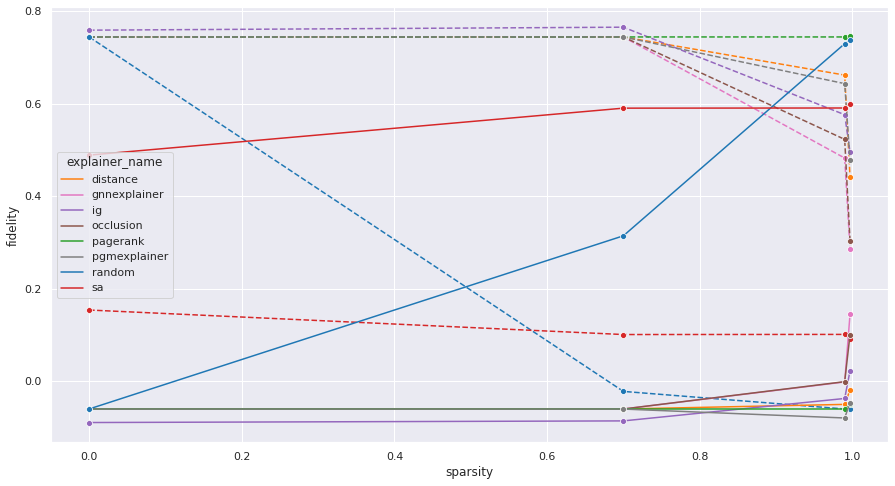

In [79]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_hard[df_hard.dataset=="cora"],
    x="sparsity", y="fidelity_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_hard[df_hard.dataset=="cora"],
    x="sparsity", y="fidelity_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

(0.0, 1.2)

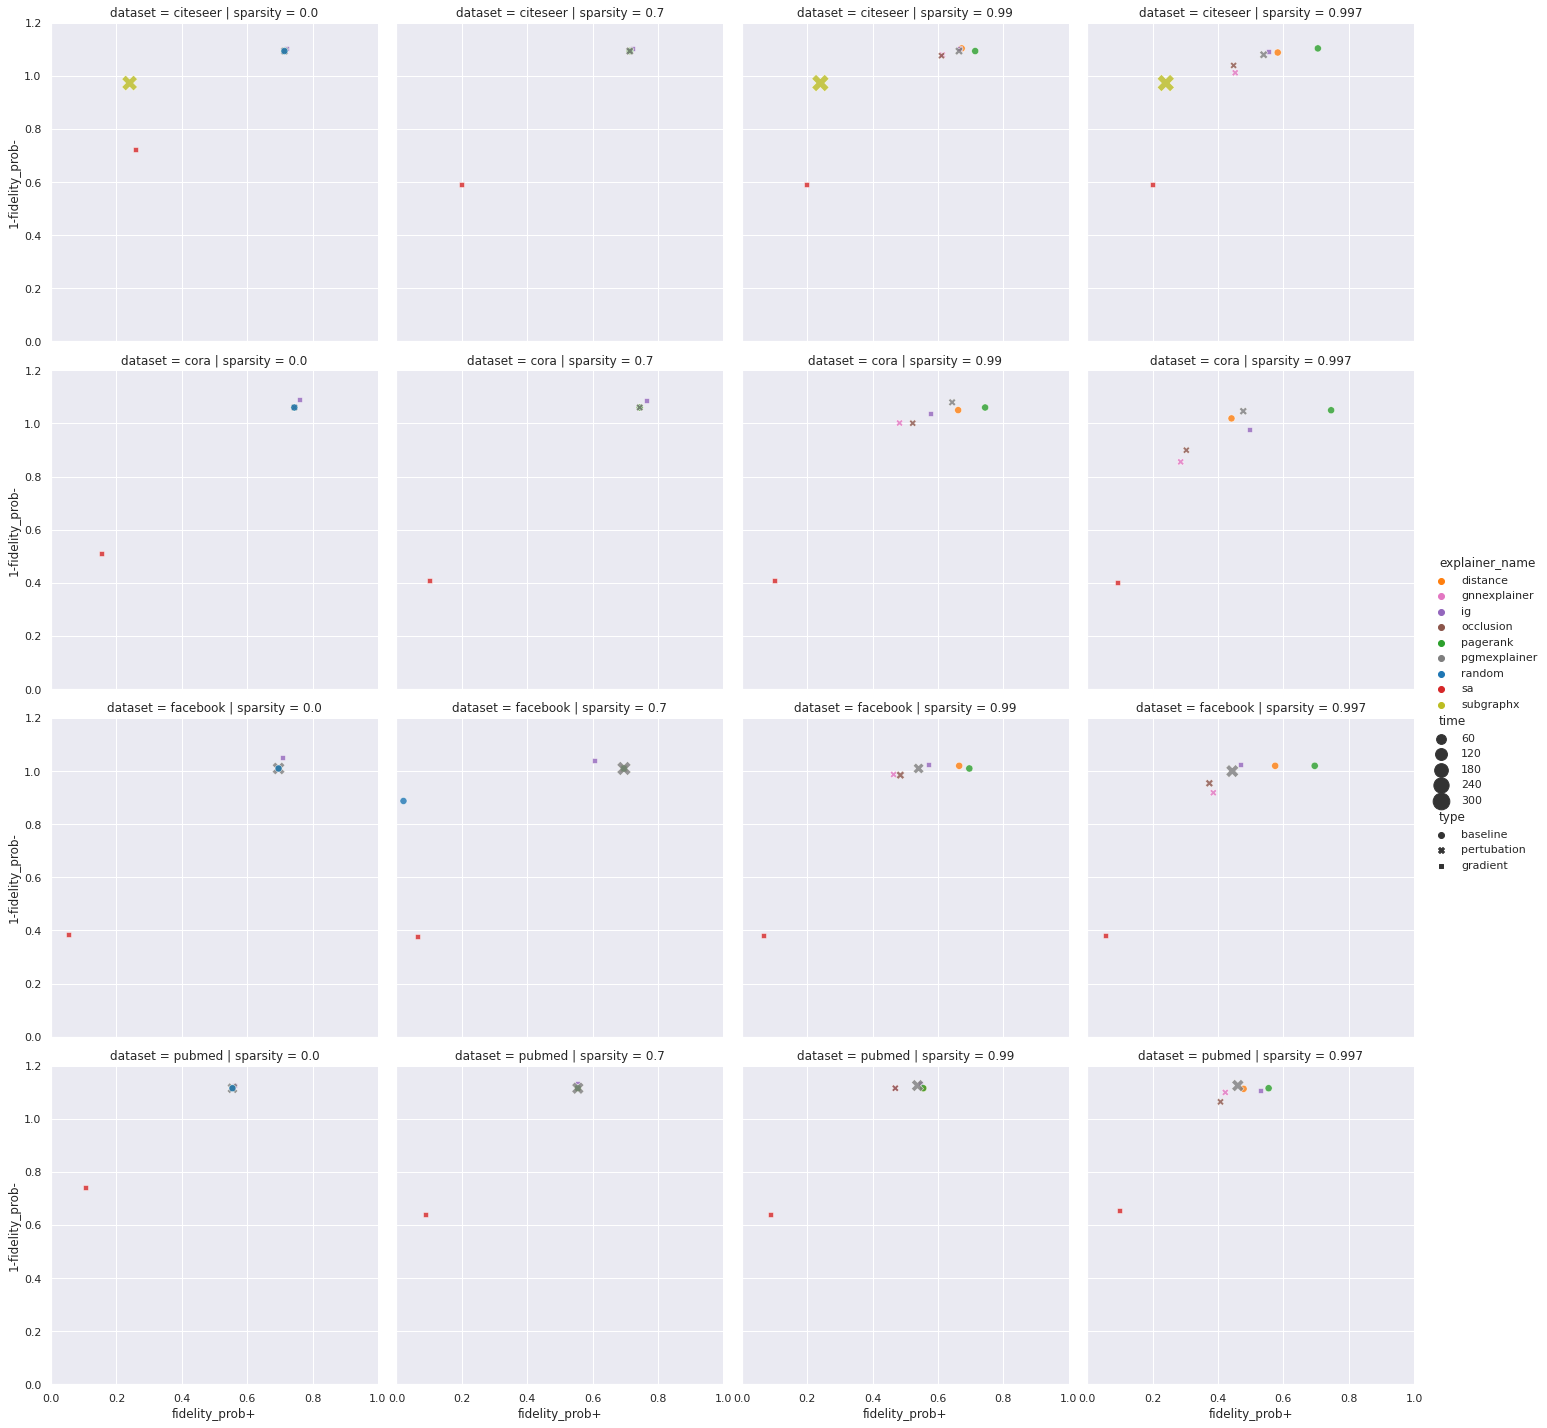

In [99]:
#### Fidelity Prob VS datasets & sparsity ####
sns.relplot(
        data=df_hard,
        x="fidelity_prob+", y="1-fidelity_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, size="time", sizes=(50, 300), style="type", alpha = .8
    )
plt.xlim(0, 1)
plt.ylim(0, 1.2)

(0.0, 1.1)

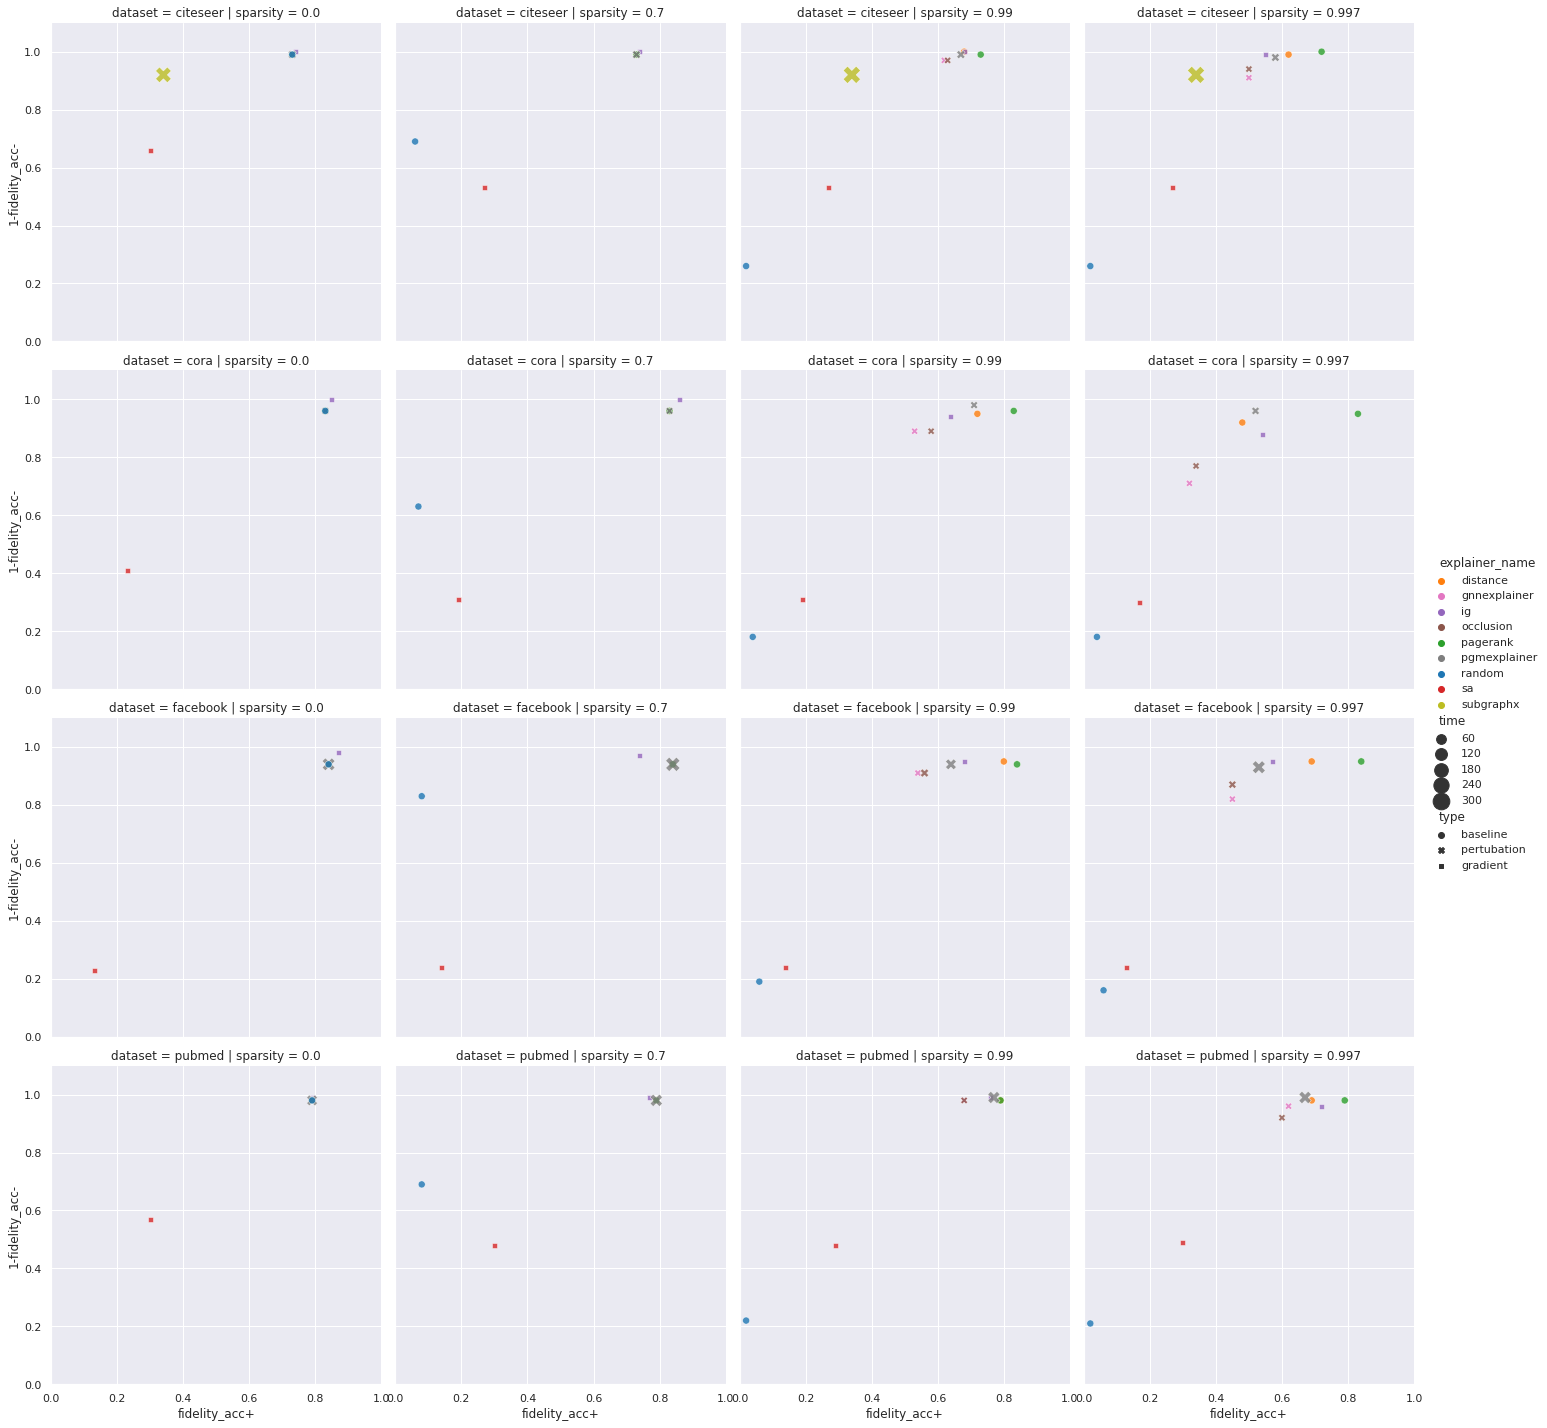

In [97]:
#### Fidelity Acc VS datasets & sparsity ####
sns.set()
sns.relplot(
        data=df_hard,
        x="fidelity_acc+", y="1-fidelity_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, size="time", sizes=(50, 300), style="type", alpha = .8
    )

plt.xlim(0, 1)
plt.ylim(0, 1.1)

## Soft mask

In [118]:
df_soft = df[df.hard_mask==False]

In [119]:
df1 = df_soft.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
df1s = df1[df1.sparsity==0.7]
res_init = df1s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])

dataset,citeseer,cora,facebook,pubmed,mean_charact
explainer_name,,,,,
sa,0.311984,0.182530,0.115644,0.249867,0.215006
random,0.257769,0.198122,0.201001,0.241085,0.224494
gnnexplainer,0.567725,0.531864,0.511666,0.517786,0.532260
distance,0.630717,0.613786,0.443403,0.506205,0.548528
pagerank,0.665896,0.646781,0.438301,0.561711,0.578172
ig,0.667131,0.653018,0.486546,0.575476,0.595543
pgmexplainer,0.802527,0.756726,0.701942,0.640289,0.725371
occlusion,0.812544,0.821023,0.805203,0.708666,0.786859


In [88]:
#### Average characterization power for Cora according to sparsity ####
df1 = df_soft.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
res_init = df1[['dataset', 'explainer_name', 'sparsity', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name', 'sparsity']).mean()

df_char_cora = pd.pivot_table(res_init[res_init.dataset=="cora"], values='charact', index=['explainer_name'], columns='sparsity')
df_char_cora['mean_charact'] = df_char_cora.mean(axis=1)
df_char_cora.sort_values(by=['mean_charact'])

sparsity,0.0,0.7,0.99,0.997,mean_charact
explainer_name,,,,,
random,0.472930,0.198122,0.013259,0.002620,0.171733
sa,0.209823,0.182530,0.181100,0.176573,0.187507
gnnexplainer,0.567997,0.531864,0.463380,0.386089,0.487332
distance,0.613786,0.613786,0.547067,0.450511,0.556287
ig,0.655124,0.653018,0.575580,0.528524,0.603062
pagerank,0.646781,0.646781,0.639896,0.628426,0.640471
occlusion,0.821023,0.821023,0.653773,0.478936,0.693689
pgmexplainer,0.756726,0.756726,0.704958,0.610952,0.707340


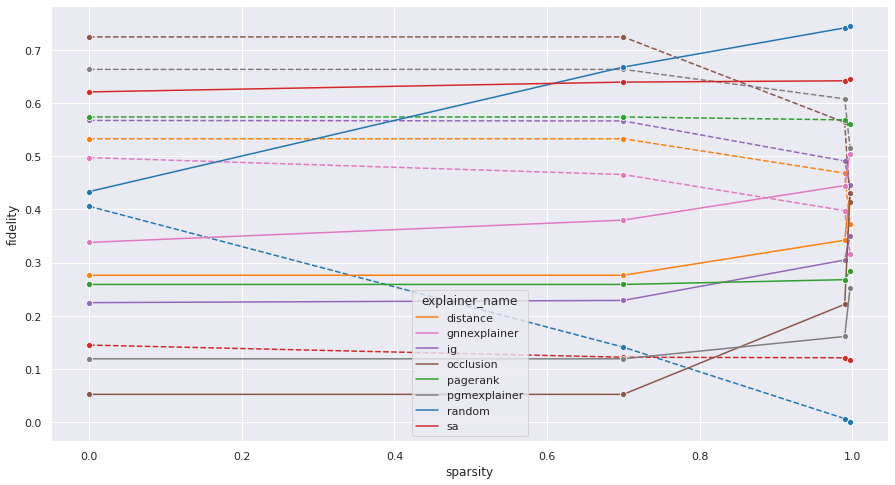

In [89]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_soft[df_soft.dataset=="cora"],
    x="sparsity", y="fidelity_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_soft[df_soft.dataset=="cora"],
    x="sparsity", y="fidelity_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

(0.0, 1.0)

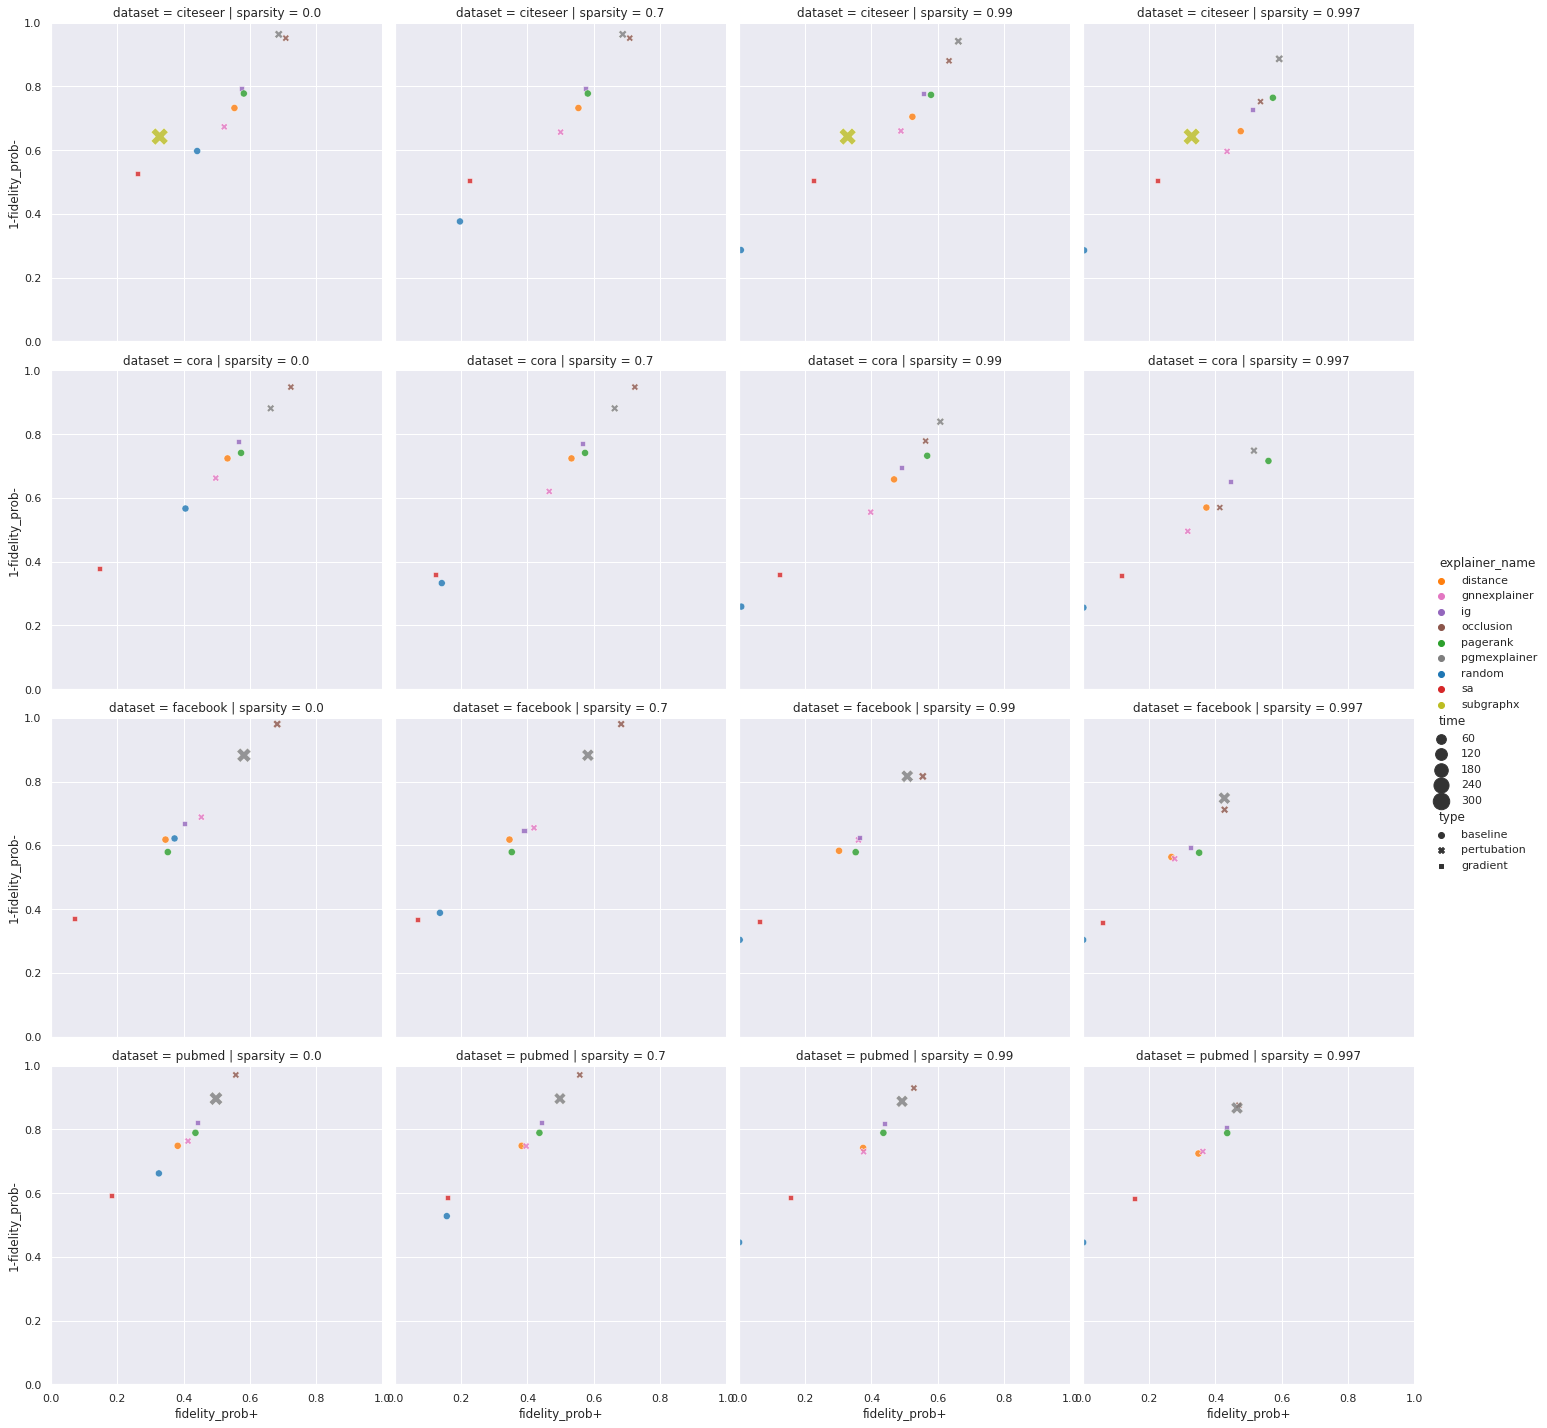

In [94]:
#### Fidelity Prob VS datasets & sparsity ####
sns.set()
sns.relplot(
        data=df_soft,
        x="fidelity_prob+", y="1-fidelity_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, size="time", sizes=(50, 300), style="type", alpha = .8
    )
plt.xlim(0, 1)
plt.ylim(0, 1)

(0.0, 1.0)

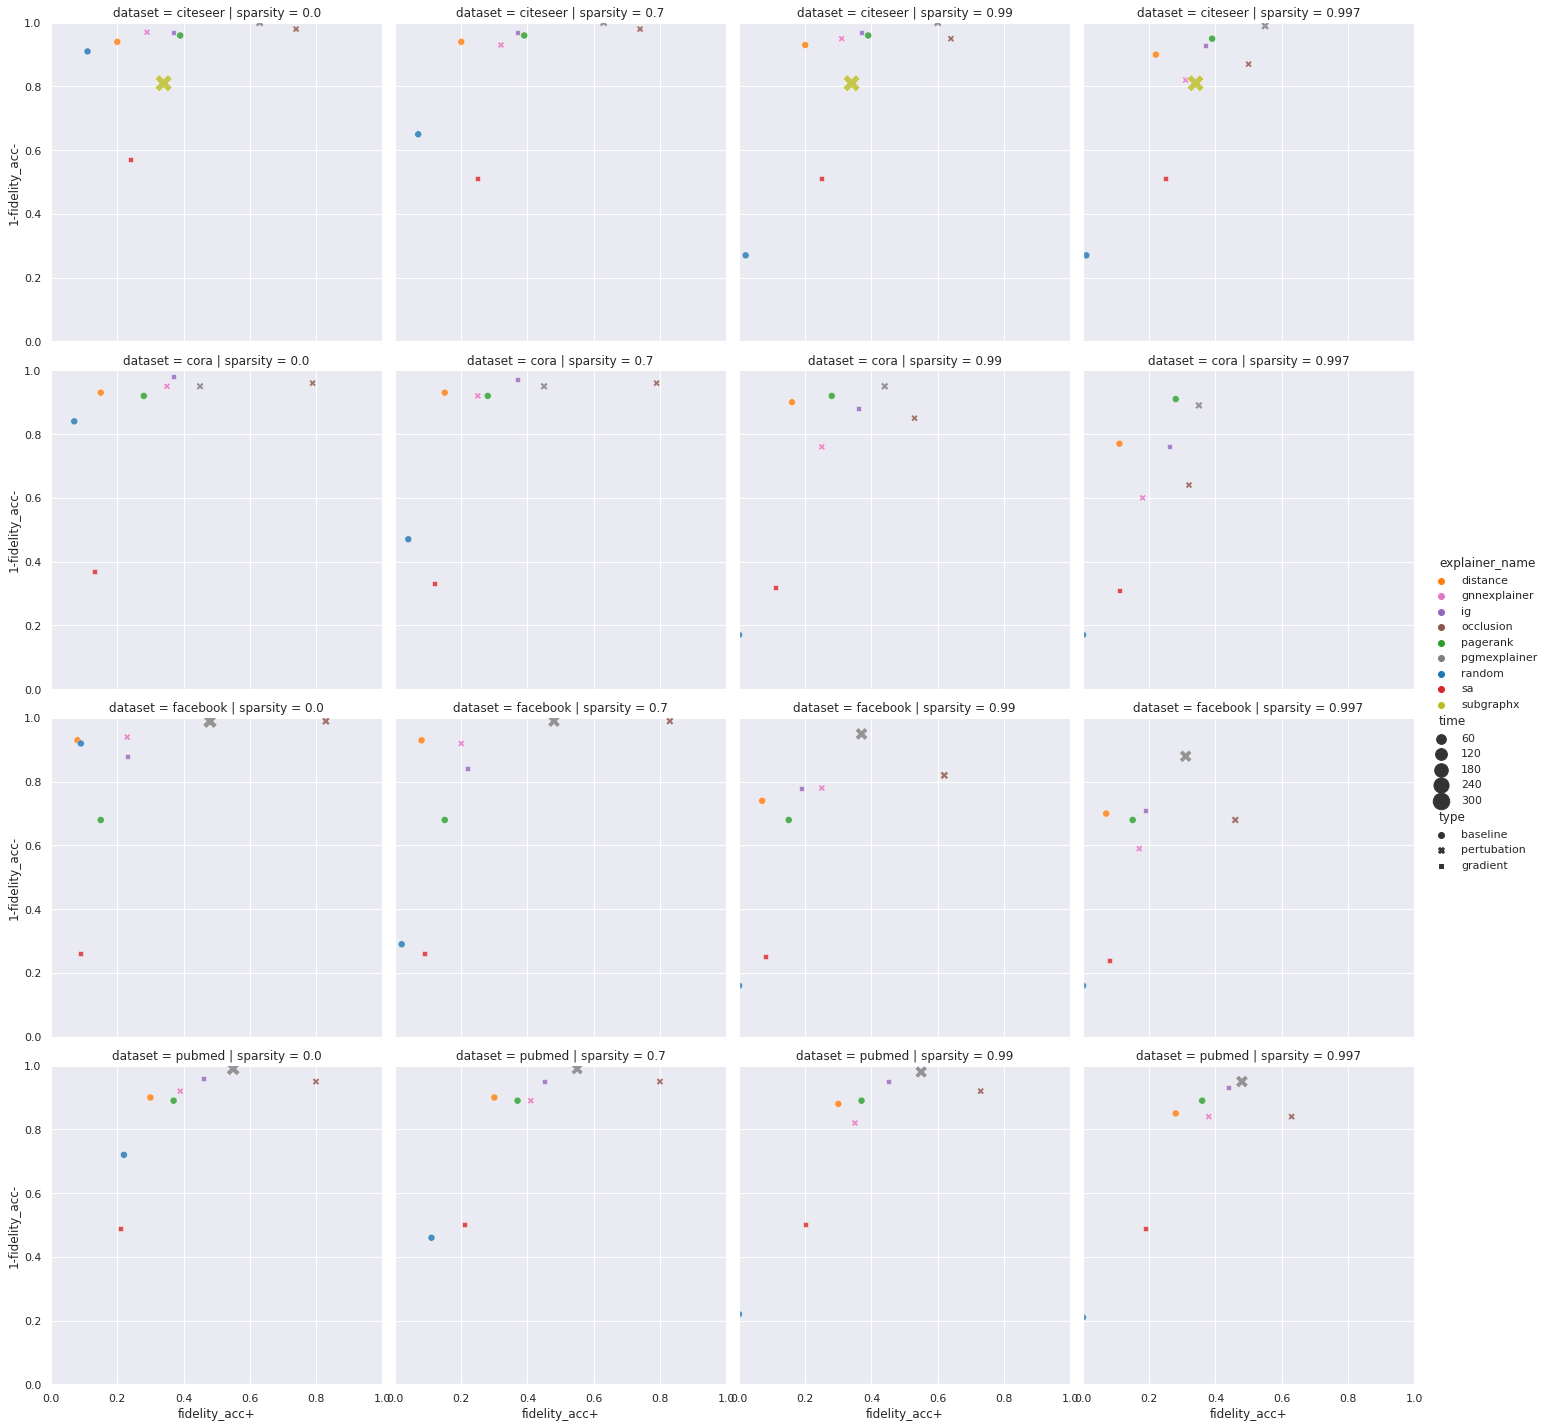

In [95]:
#### Fidelity Acc VS datasets & sparsity ####
sns.set()
sns.relplot(
        data=df_soft,
        x="fidelity_acc+", y="1-fidelity_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, size="time", sizes=(50, 300), style="type", alpha = .8
    )

plt.xlim(0, 1)
plt.ylim(0, 1)

# Explain focus: GNN model

true_label_as_target = False

In [90]:
df_gnn = df_sparsity[df_sparsity['true_label_as_target']==False].reset_index()

In [91]:
df_gnn["1-fidelity_gnn_acc-"] = 1- df_gnn["fidelity_gnn_acc-"]
df_gnn["1-fidelity_gnn_prob-"] = 1- df_gnn["fidelity_gnn_prob-"]
df_gnn['charact'] = 2 * df_gnn['fidelity_gnn_prob+'] * (1-df_gnn['fidelity_gnn_prob-'])/ (df_gnn['fidelity_gnn_prob+']  + 1-df_gnn['fidelity_gnn_prob-'])


## Hard mask

In [115]:
df_gnn_hard = df_gnn[df_gnn.hard_mask==True]

In [116]:
df0 = df_gnn_hard.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
df0s = df0[df0.sparsity==0.7]
res_init = df0s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])

dataset,citeseer,cora,facebook,pubmed,mean_charact
explainer_name,,,,,
random,0.319454,0.259894,0.202963,0.280497,0.265702
subgraphx,0.470423,NaN,NaN,NaN,0.470423
occlusion,0.722838,0.777038,0.783738,0.623854,0.726867
distance,0.722838,0.777038,0.783738,0.623854,0.726867
gnnexplainer,0.722838,0.777038,0.783738,0.623854,0.726867
pagerank,0.722838,0.777038,0.783738,0.623854,0.726867
pgmexplainer,0.722837,0.778810,0.786358,0.623854,0.727965


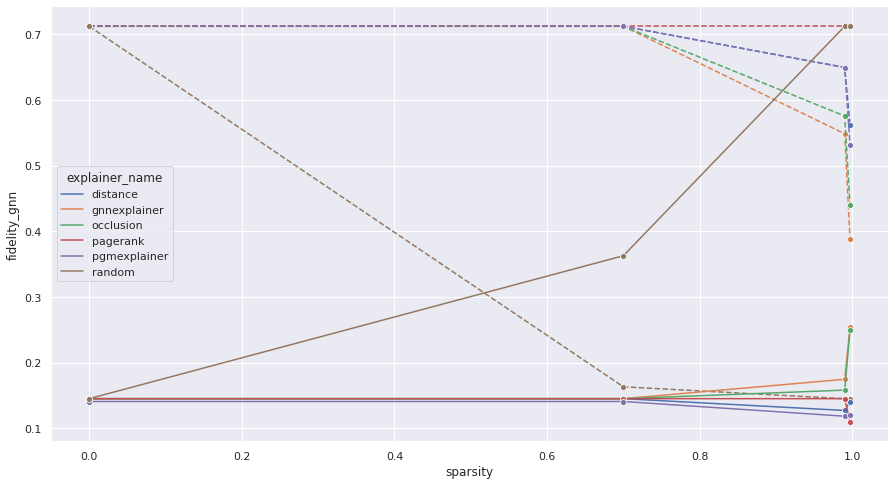

In [97]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_gnn_hard[df_gnn_hard.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob+",
    hue="explainer_name", marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_gnn_hard[df_gnn_hard.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob-",
    hue="explainer_name", marker="o", ax=ax)


plt.ylabel('fidelity_gnn')
plt.show()

(0.0, 1.0)

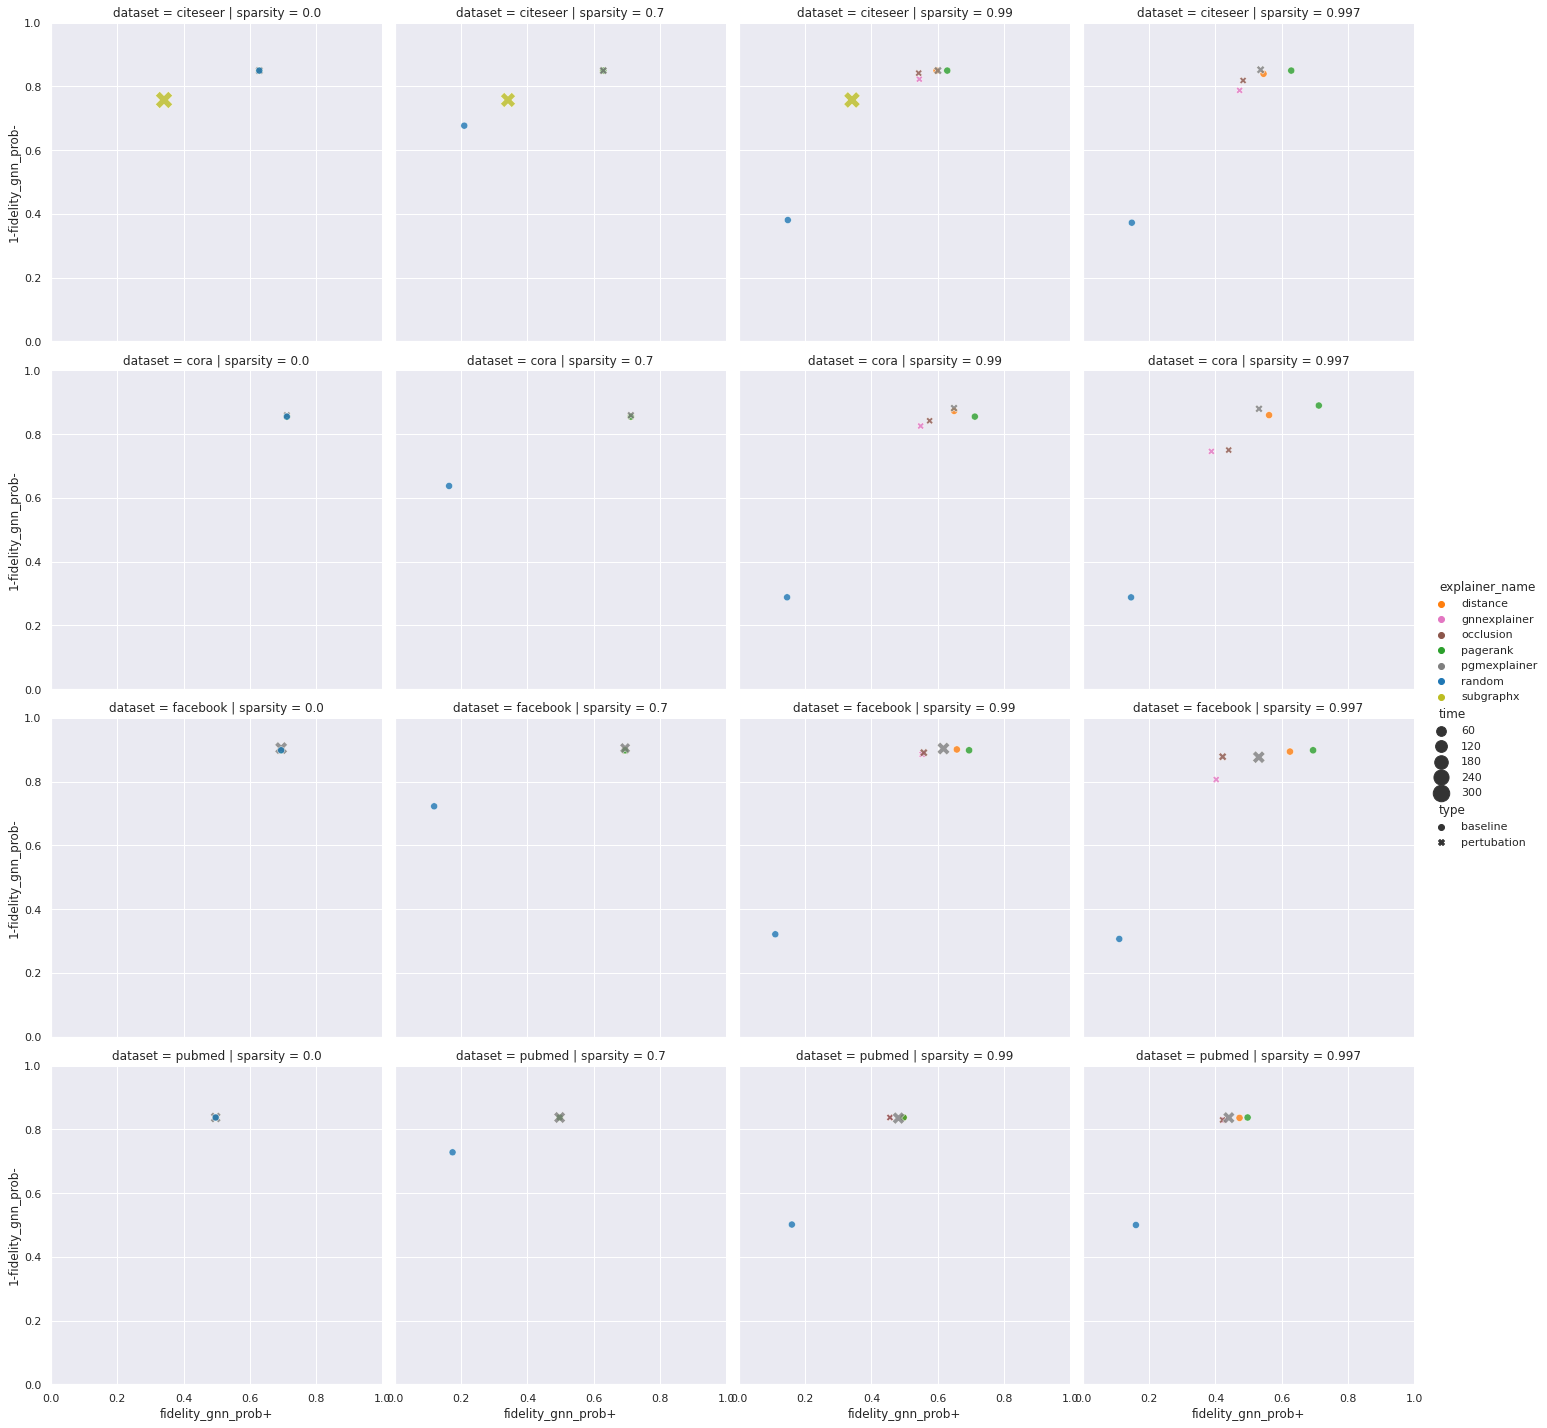

In [98]:
#### Fidelity Prob VS datasets & sparsity ####
sns.relplot(
        data=df_gnn_hard,
        x="fidelity_gnn_prob+", y="1-fidelity_gnn_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, size="time", sizes=(50, 300), style="type", alpha = .8
    )

plt.xlim(0, 1)
plt.ylim(0, 1)

(0.0, 1.0)

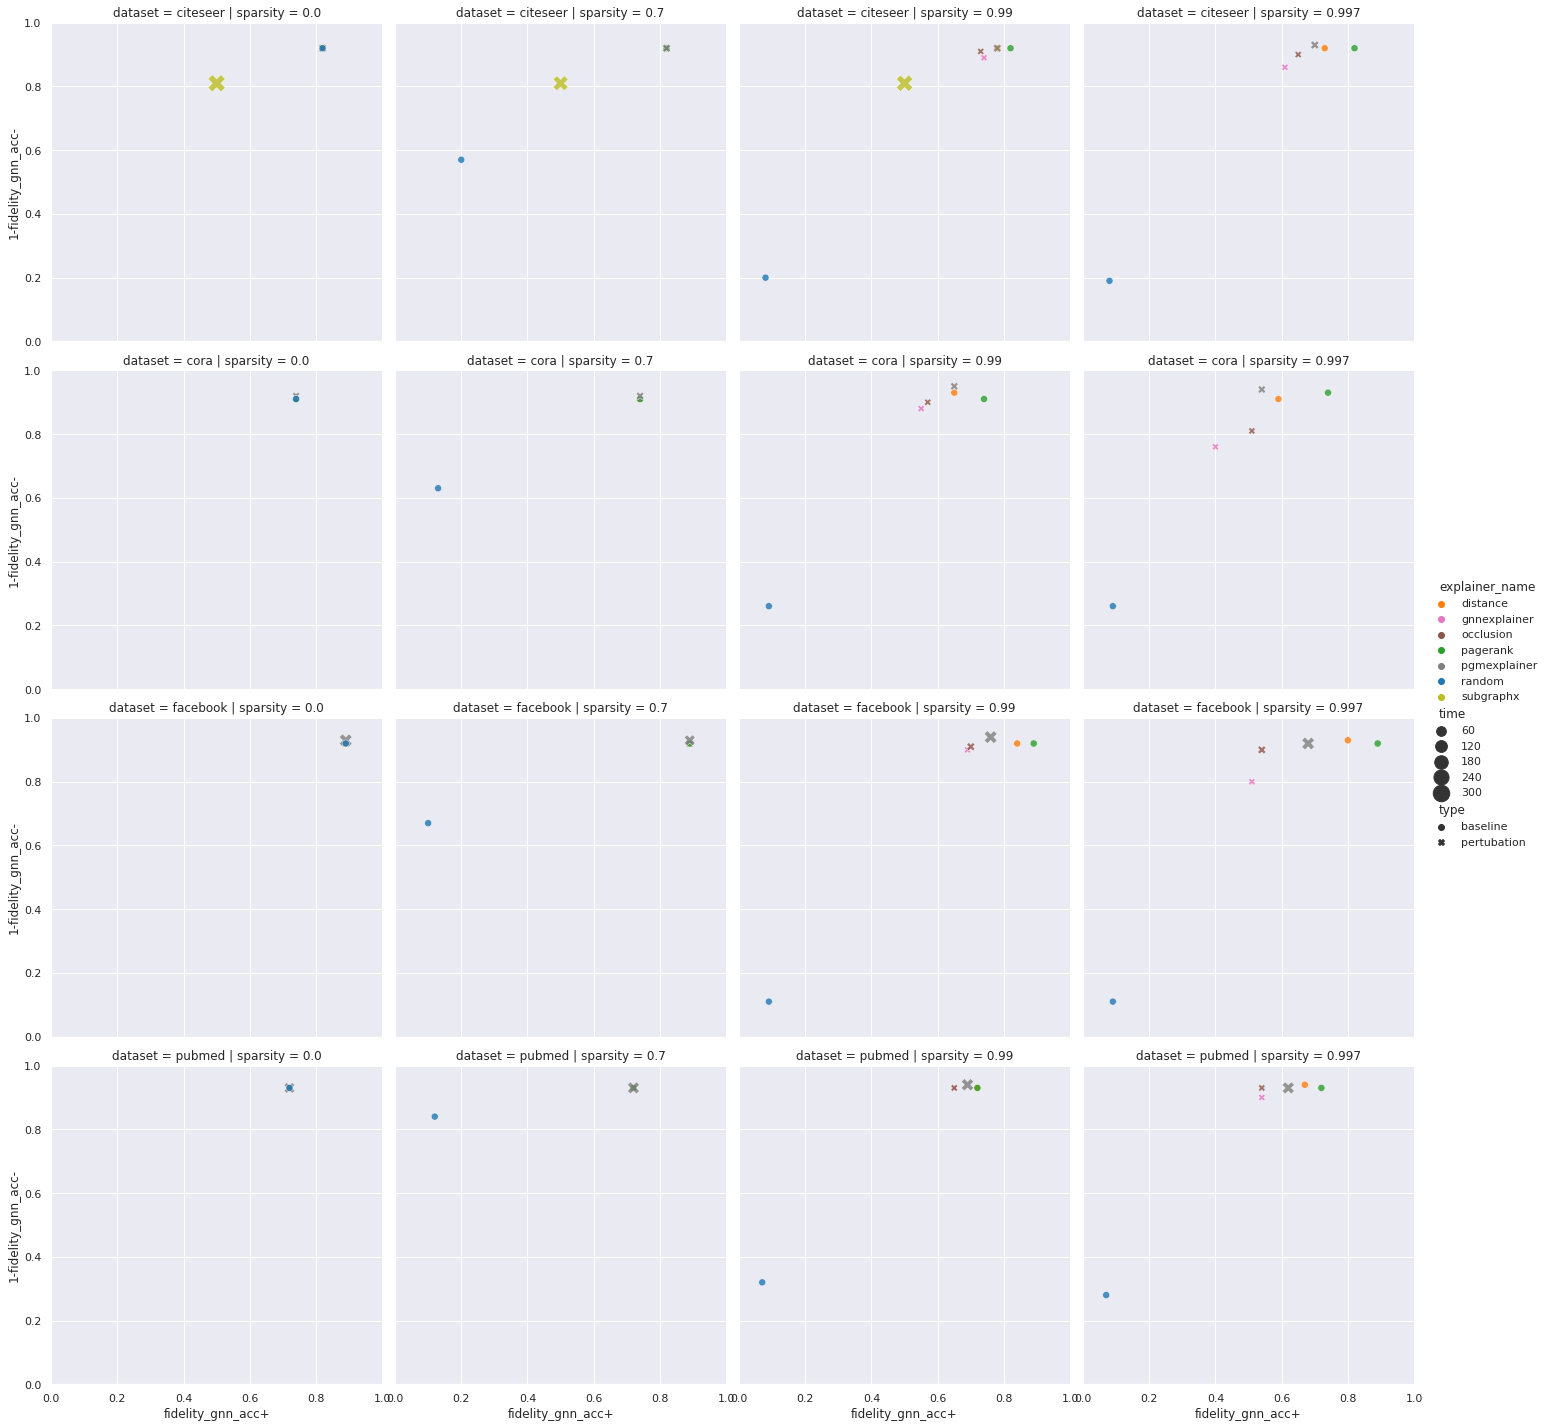

In [99]:
#### Fidelity Acc VS datasets & sparsity ####
sns.set()
sns.relplot(
        data=df_gnn_hard,
        x="fidelity_gnn_acc+", y="1-fidelity_gnn_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, size="time", sizes=(50, 300), style="type", alpha = .8
    )
plt.xlim(0, 1)
plt.ylim(0, 1)

## Soft mask

In [112]:
df_gnn_soft = df_gnn[df_gnn.hard_mask==False]

In [113]:
##### Characterization #####
df1 = df_gnn_soft.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
df1s = df1[df1.sparsity==0.7]
res_init = df1s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])

dataset,citeseer,cora,facebook,pubmed,mean_charact
explainer_name,,,,,
random,0.277391,0.203577,0.158746,0.248366,0.222020
subgraphx,0.469739,NaN,NaN,NaN,0.469739
gnnexplainer,0.589432,0.545948,0.492764,0.490121,0.529566
distance,0.609529,0.602791,0.435326,0.472339,0.529996
pagerank,0.659461,0.636224,0.438805,0.512978,0.561867
pgmexplainer,0.744878,0.751814,0.673860,0.602182,0.693183
occlusion,0.734199,0.804665,0.789688,0.655490,0.746010


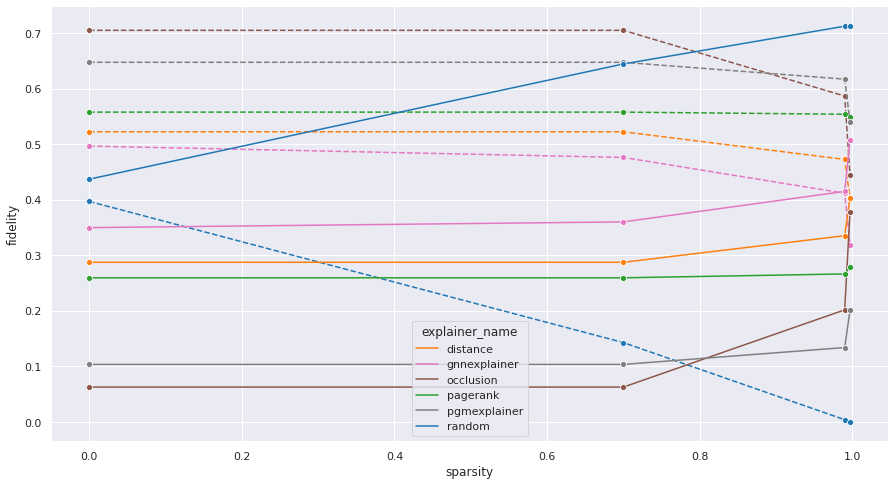

In [103]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_gnn_soft[df_gnn_soft.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_gnn_soft[df_gnn_soft.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

(0.0, 1.0)

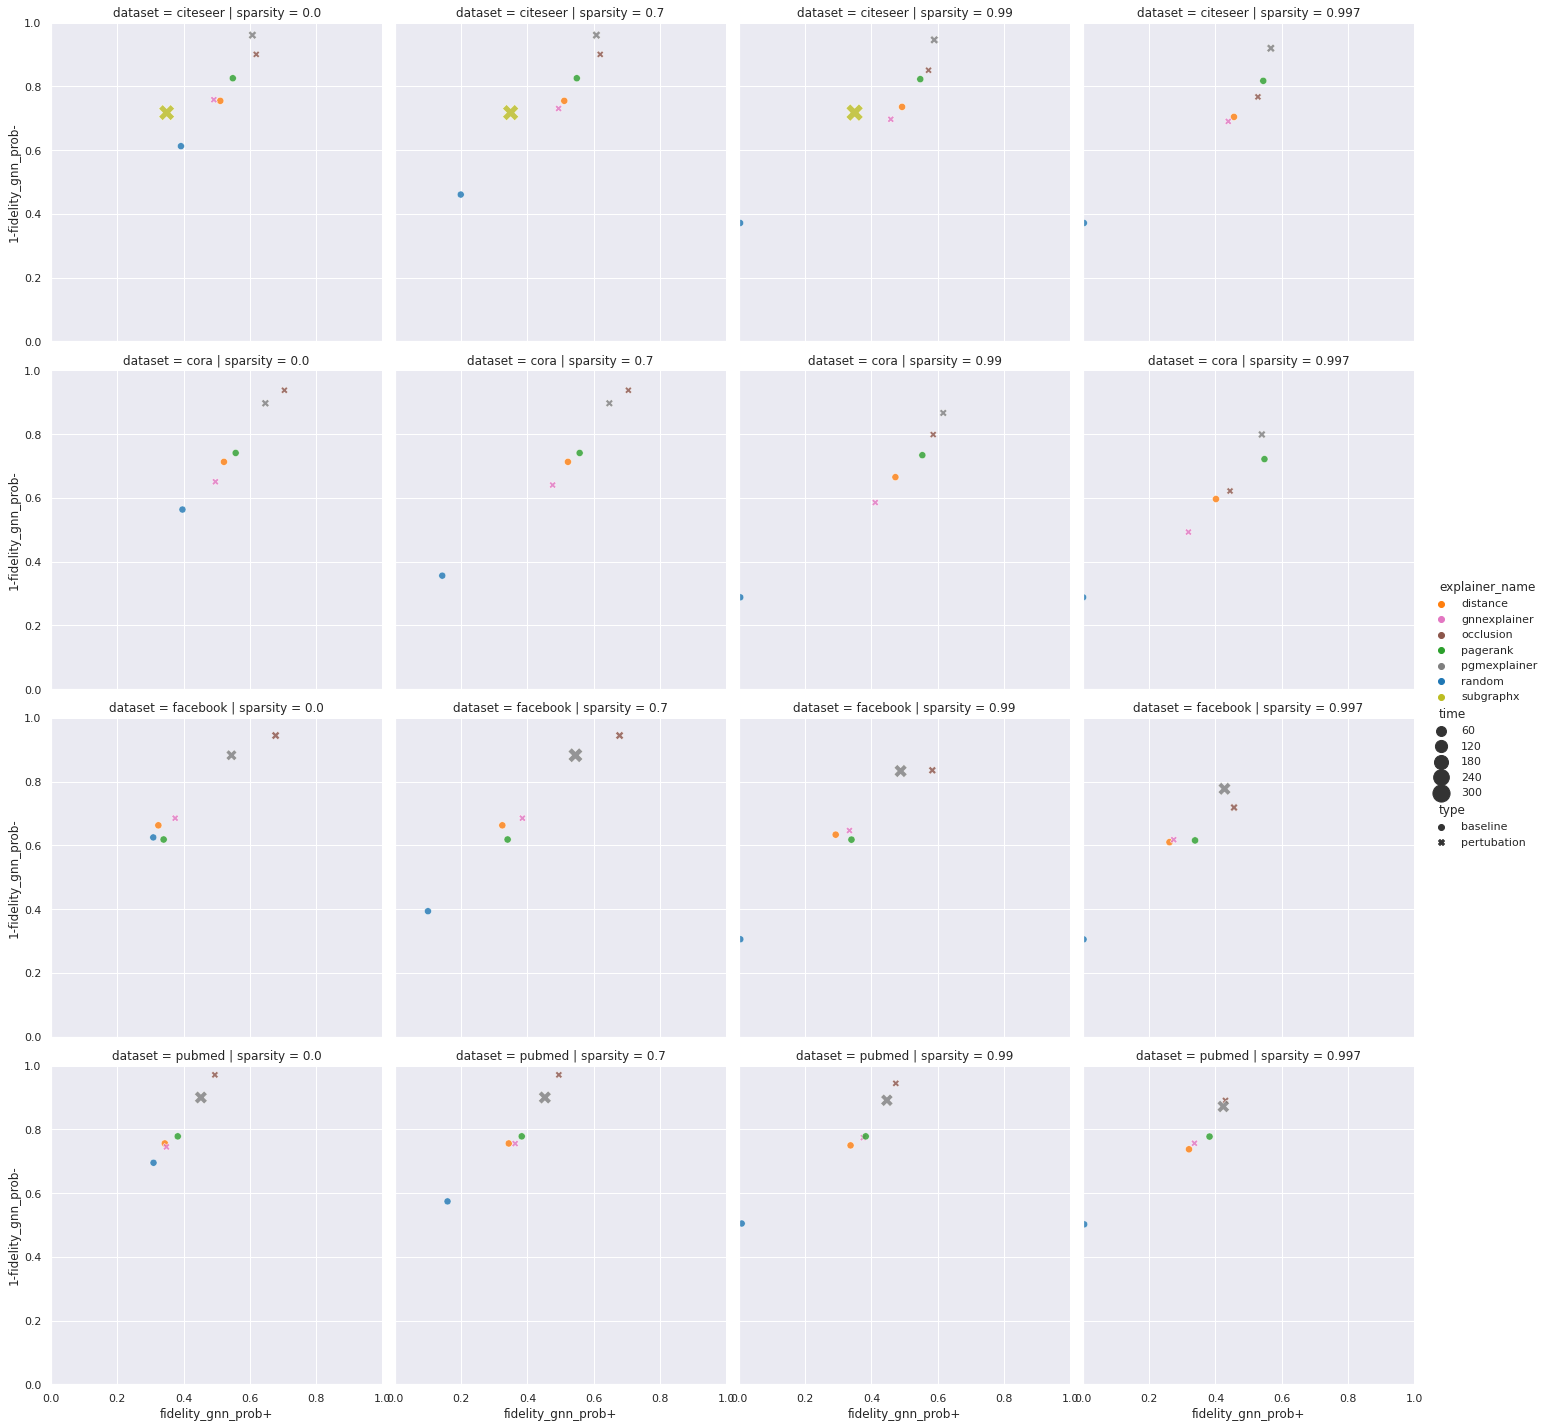

In [104]:
#### Fidelity Prob VS datasets & sparsity ####
sns.set()
sns.relplot(
        data=df_gnn_soft,
        x="fidelity_gnn_prob+", y="1-fidelity_gnn_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, size="time", sizes=(50, 300), style="type", alpha = .8
    )
plt.xlim(0, 1)
plt.ylim(0, 1)

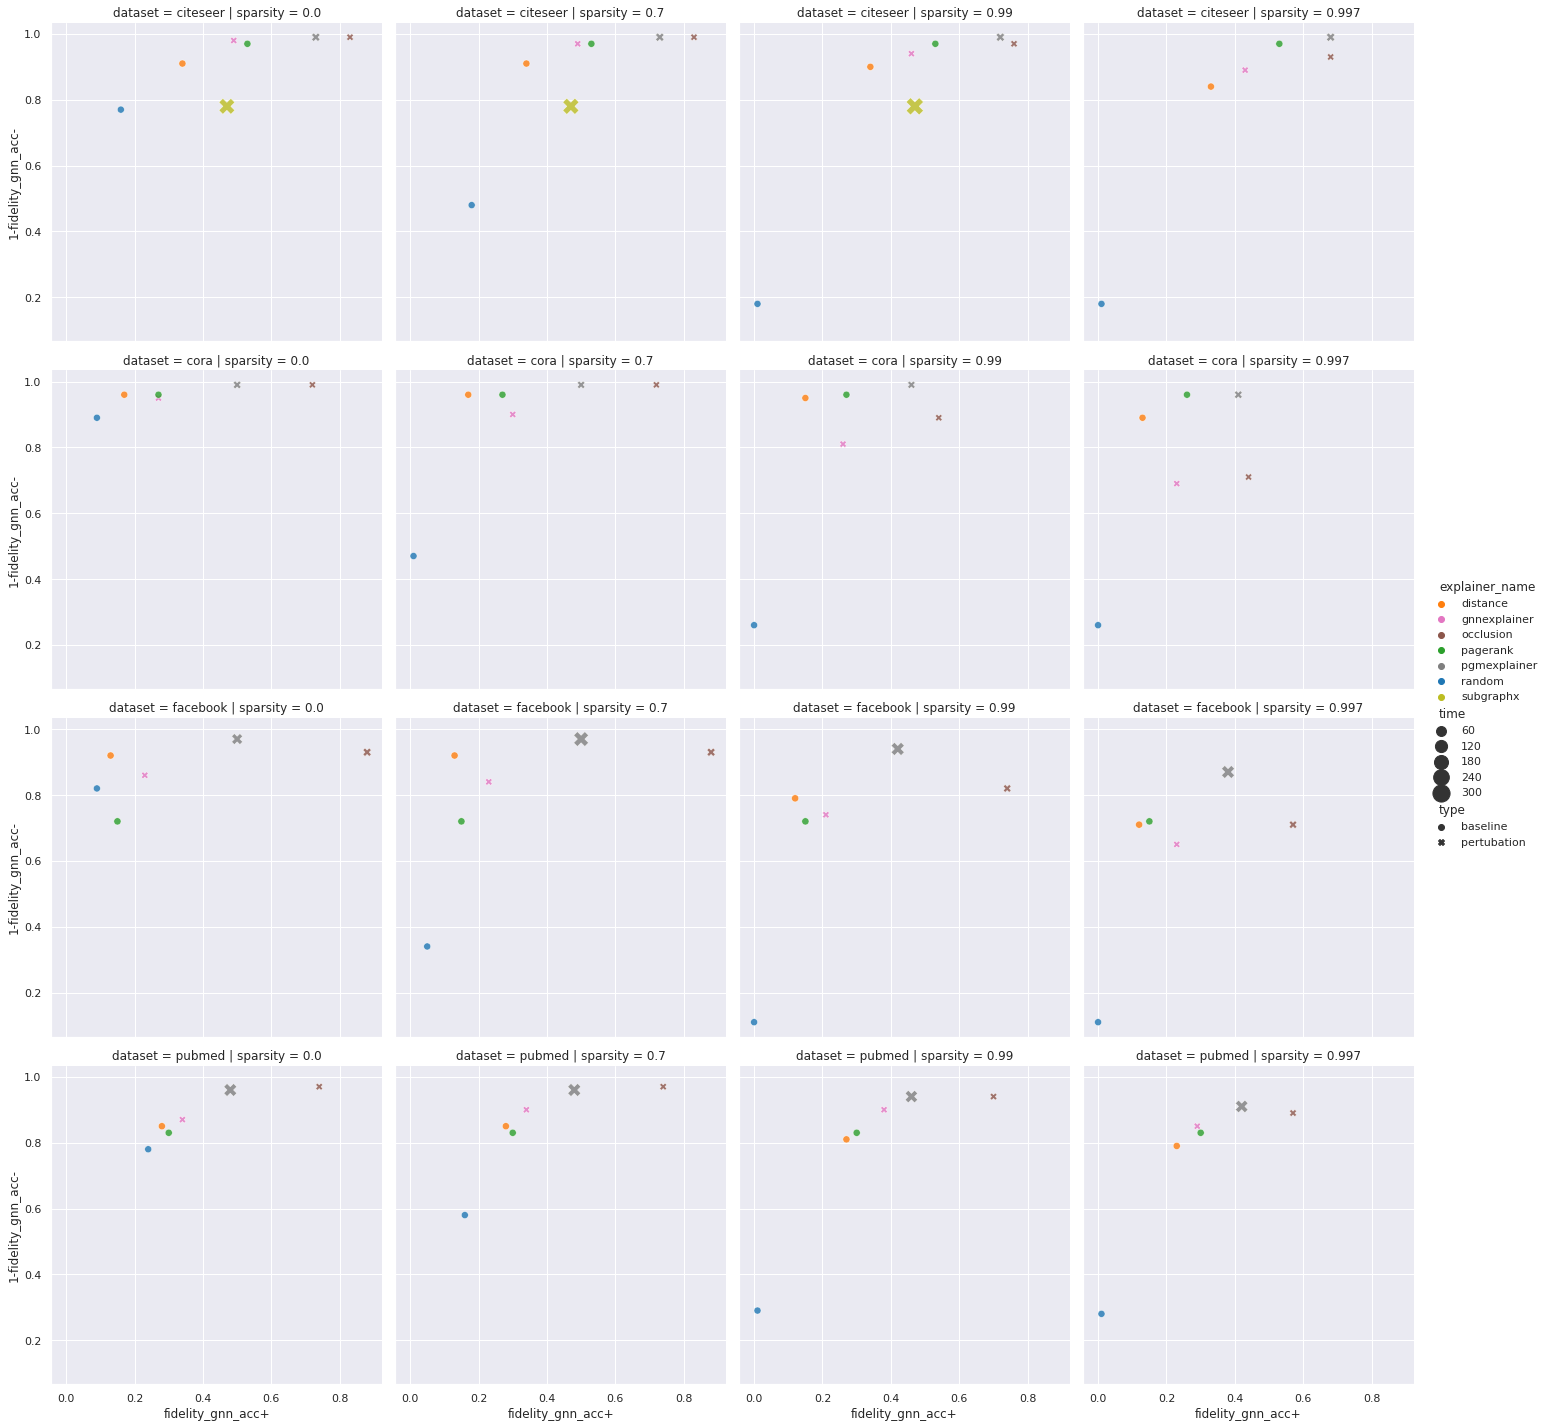

In [105]:
#### Fidelity Acc VS datasets & sparsity ####
sns.set()
sns.relplot(
        data=df_gnn_soft,
        x="fidelity_gnn_acc+", y="1-fidelity_gnn_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, size="time", sizes=(50, 300), style="type", alpha = .8
    )

# Characterization Summary

In [165]:
sparsity = 0.99
names = ["_hard", "_soft", "_gnn_hard", "_gnn_soft"]
dfs = []
for name in names:
    df = eval("df"+name).groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
    df_small = df[df.sparsity==sparsity]
    res_init = df_small[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
    res_init.groupby(by=['dataset', 'explainer_name']).mean()
    #### Average characterization power among datasets for sparsity=0.7 ####
    df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
    df_char['charact'] = df_char.mean(axis=1)
    df_char.sort_values(by=['charact'])

    c = df_char.rename_axis(None, axis=1).reset_index()
    c = c[["explainer_name", "charact"]]
    dfs.append(c)
    

    

In [166]:
for i in range(4):
    locals()["c"+names[i]] = dfs[i]

In [167]:
s_phen = pd.merge(dfs[0], dfs[1], on="explainer_name", how="outer", suffixes=["_phen_hard", "_phen_soft"])
s_gnn = pd.merge(dfs[2], dfs[3], on="explainer_name", how="outer", suffixes=["_gnn_hard", "_gnn_soft"])
summary = pd.merge(s_phen, s_gnn, on="explainer_name", how="outer")
summary

,explainer_name,charact_phen_hard,charact_phen_soft,charact_gnn_hard,charact_gnn_soft
0,distance,0.798422,0.510989,0.707573,0.501731
1,gnnexplainer,0.681436,0.494254,0.646454,0.495479
2,ig,0.760466,0.564055,NaN,NaN
3,occlusion,0.694184,0.681414,0.655053,0.669688
4,pagerank,0.825835,0.575613,0.726867,0.559977
5,pgmexplainer,0.766050,0.685663,0.699111,0.664413
6,random,-0.183499,0.007240,0.202744,0.009395
7,sa,0.181370,0.210647,NaN,NaN
8,subgraphx,0.385384,0.434344,0.470423,0.469739


In [168]:
summary.to_csv('charact_summary_0.99.csv')